In [242]:
%reload_ext autoreload
%autoreload 2

In [243]:
from pici.pici import Pici
from pici.communities.oem import OEMCommunityFactory
from pici.communities.osm import OSMCommunityFactory
from pici.communities.preciousplastic import PPCommunityFactory
import pandas as pd

from pici.labelling import InnovationLabels

import plotly.express as ex

In [244]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
pd.options.plotting.backend = "plotly"

In [246]:
pici = Pici(
    communities={
        'OpenEnergyMonitor': OEMCommunityFactory,
        'OpenStreetMap': OSMCommunityFactory,
        'PreciousPlastic': PPCommunityFactory,
    },
    labels=[
        InnovationLabels(
            pd.read_excel("../test_integrated_labels.xlsx")
        ),
        InnovationLabels().from_limesurvey(
            pd.read_excel("../results-survey664322_2022-08-01.xlsx"),
            drop_labellers=["Test","test"]
        )
    ],
    cache_dir='../../../cache',
    start='2017-01-01',
    end='2019-01-01',
    cache_nrows=500
)

         labeller          community  \
0    anna+philipp  OpenEnergyMonitor   
1    anna+philipp  OpenEnergyMonitor   
2    anna+philipp  OpenEnergyMonitor   
3    anna+philipp  OpenEnergyMonitor   
4    anna+philipp  OpenEnergyMonitor   
..            ...                ...   
260        Jan P.    PreciousPlastic   
261        Jan P.    PreciousPlastic   
262        Jan P.    PreciousPlastic   
263        Jan P.    PreciousPlastic   
264        Jan P.    PreciousPlastic   

                                                   url  label_idea  \
0    https://community.openenergymonitor.org/t/iota...       False   
1    https://community.openenergymonitor.org/t/new-...       False   
2    https://community.openenergymonitor.org/t/read...        True   
3    https://community.openenergymonitor.org/t/graf...        True   
4    https://community.openenergymonitor.org/t/lots...       False   
..                                                 ...         ...   
260  https://davehakkens.nl/c

In [247]:
label_stats = pici.labels.labels[0].stats

In [248]:
print(pici.labels.labels[0])

<class 'pici.labelling.InnovationLabels'>
   Level: topics
   Labelled entities: 1060
   Labels (cols): 8
   Labellers: 15
   Communities: 3



In [249]:
label_stats.label_correlation()

,label_idea,label_evaluation,label_implementation,label_modification,label_improvement,label_any_activity,label_has_potential
label_idea,1.000000,0.656722,0.297208,0.329119,0.241518,0.742870,0.584389
label_evaluation,0.656722,1.000000,0.422054,0.450873,0.336008,0.744328,0.546075
label_implementation,0.297208,0.422054,1.000000,0.405513,0.313587,0.396079,0.258492
label_modification,0.329119,0.450873,0.405513,1.000000,0.518743,0.535077,0.318922
label_improvement,0.241518,0.336008,0.313587,0.518743,1.000000,0.422157,0.303628
label_any_activity,0.742870,0.744328,0.396079,0.535077,0.422157,1.000000,0.571980
label_has_potential,0.584389,0.546075,0.258492,0.318922,0.303628,0.571980,1.000000


In [250]:
label_stats.plot_label_correlation()

In [251]:
label_stats.label_counts(normalize=True)

label_idea              0.401887
label_evaluation        0.402830
label_implementation    0.160377
label_modification      0.258491
label_improvement       0.178302
label_any_activity      0.549057
label_has_potential     0.333019
dtype: float64

In [252]:
label_stats.label_counts(normalize=True).plot(kind='bar')

In [253]:
label_stats.label_counts_by_labeller(normalize=True)

,label_idea,label_evaluation,label_implementation,label_modification,label_improvement,label_any_activity,label_has_potential
labeller,,,,,,,
Jan P.,0.702128,0.617021,0.148936,0.308511,0.255319,0.723404,0.553191
Jan-Philipp (JP),0.554054,0.472973,0.135135,0.256757,0.297297,0.702703,0.527027
Jonathan1.732,0.344444,0.255556,0.088889,0.066667,0.044444,0.366667,0.333333
Larilu,0.232432,0.227027,0.081081,0.048649,0.016216,0.259459,0.243243
Phoebetan310@gmail.com,0.000000,0.000000,0.400000,0.000000,0.000000,0.400000,0.200000
anna+philipp,0.484536,0.432990,0.164948,0.226804,0.288660,0.659794,0.422680
cmcuza@gmail.com,0.044444,0.000000,0.022222,0.044444,0.007407,0.103704,0.111111
elisagleu@gmail.com,0.266667,0.520000,0.346667,0.213333,0.240000,0.613333,0.426667
f.hetyei@yahoo.de,0.600000,0.600000,0.400000,0.400000,0.200000,0.800000,0.800000


In [254]:
label_stats.plot_label_counts_by_labeller()

In [255]:
label_stats.plot_label_counts_by_labeller(normalize=False)

In [256]:
label_stats.interrater_agreement()

,% complete agreement,base n,Cohen kappa,Fleiss kappa,Krippendorff alpha
label_idea,0.653846,130.0,NaN,NaN,0.473653
label_evaluation,0.615385,130.0,NaN,NaN,0.422587
label_implementation,0.646154,130.0,NaN,NaN,0.187391
label_modification,0.630769,130.0,NaN,NaN,0.323281
label_improvement,0.661538,130.0,NaN,NaN,0.289965
label_potential,0.641026,117.0,NaN,NaN,0.637885
label_any_activity,0.607692,130.0,NaN,NaN,0.399940
label_has_potential,0.638462,130.0,NaN,NaN,0.427715


In [257]:
label_stats.plot_interrater_agreement()

In [268]:
goldstandard="anna+philipp"
agr = label_stats.pairwise_interrater_agreement(goldstandard=goldstandard, min_comparisons=1)

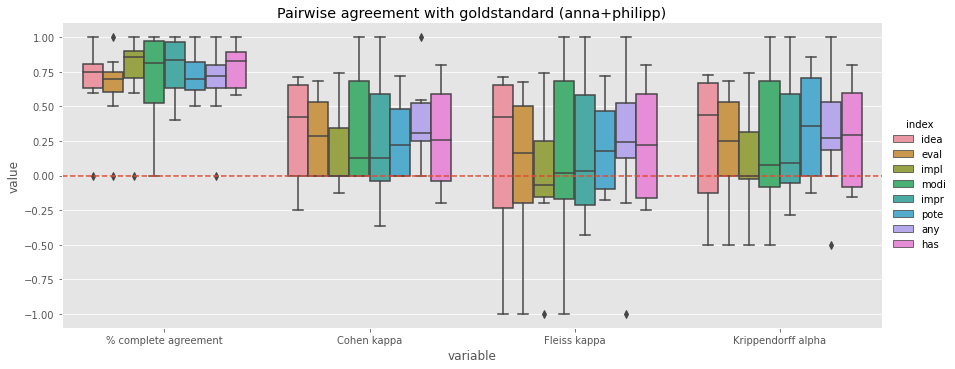

In [269]:
label_stats.plot_goldstandard_agreement(kind='label_boxplots', data=agr).set(
    title=f"Pairwise agreement with goldstandard ({goldstandard})"
)

Text(0.5, 0.98, 'Agreement with goldstandard (anna+philipp)')

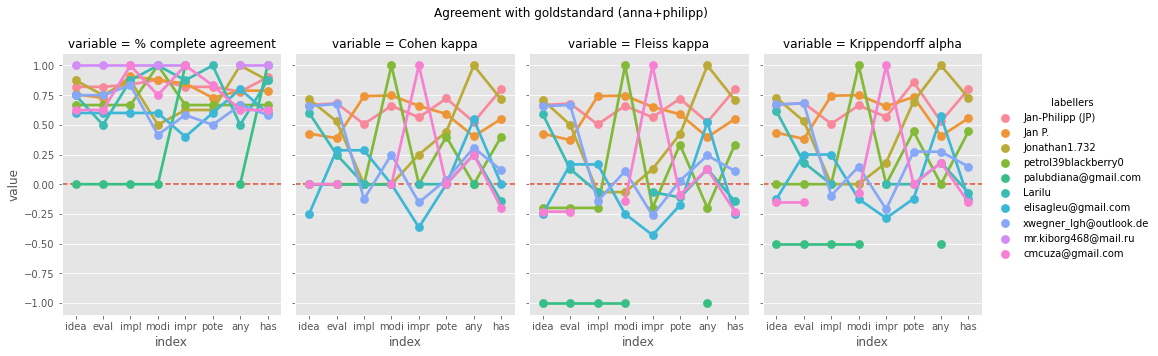

In [280]:
g = label_stats.plot_goldstandard_agreement(kind='labeller_points', data=agr)
g.fig.subplots_adjust(
    top=.85
)
g.fig.suptitle(
    f"Agreement with goldstandard ({goldstandard})"
)

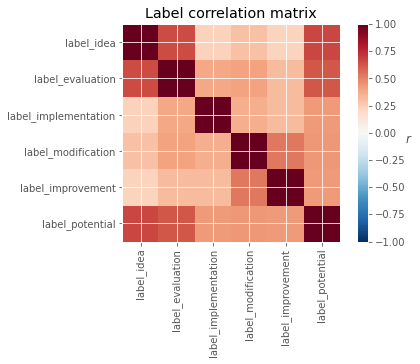

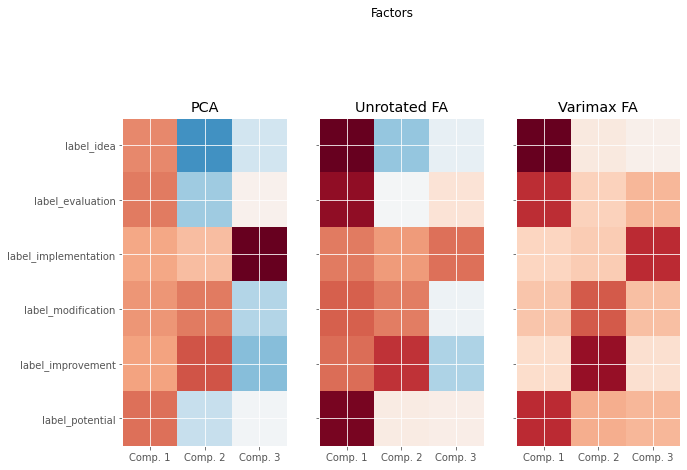

In [261]:
feat_corr, label_loadings = label_stats.plot_latent_model(n_comps=3)